In [6]:
#import libraries
import math
import time
from numba import jit
import numpy as np
import scipy.optimize as opt
import sys
sys.path.insert(0, '/Users/Deehrlich/Desktop/BootCamp2017/Econ/Wk3_FirmDyn/Code')
import ar1_approx as ar1
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
#initilize parameters
alpha = 0.40
beta = 0.98
delta = 0.10
zbar = 0
tau = 0.05
xi = 1.5
a = 0.5
rho = 0.95
sigma = 0.02

In [4]:
""" Problem 5 """

' Problem 5 '

In [12]:
def get_c(w,r,k,l=1):
    return w * l + (r - delta) * k

def get_r(k,l=1):
    return alpha * ((k)**(alpha-1)) * (l ** (1 - alpha))

def get_w(k,l=1):
    return (1 - alpha)*(k**alpha)*(l**(-alpha))

def get_y(k, l =1):
    return (k**alpha)*(l**(1-alpha))

def get_i(k):
    return delta*k

def euler(state, *args):
    gamma, alpha, beta, delta, tau = args
    k = state[0]
    w = get_w(k)
    r = get_r(k)
    c = get_c(w,r,k)
    error = (c**(-gamma)) - beta*(c**(-gamma))*((1 - tau)*(r - delta) + 1)
    return error

state_init = 1
args = (gamma, alpha, beta, delta, tau)
k = opt.fsolve(euler, state_init, args = args)
Y = get_y(k)
I = get_i(k)
print("Steady State Capital:", k)
print("Steady State Output:", Y)
print("Steady State Investment:", I)

Steady State Capital: [ 7.28749795]
Steady State Output: [ 2.21325461]
Steady State Investment: [ 0.7287498]


In [13]:
""" Problem 6 """

' Problem 6 '

In [28]:
def euler(state, *args):
    gamma, alpha, beta, delta, tau, a, xi = args
    k, l = state
    w = get_w(k, l)
    r = get_r(k, l)
    c = get_c(w, r, k, l)
    error1 = (c**(-gamma)) - beta*(c**(-gamma))*((1 - tau)*(r - delta) + 1)
    error2 = a*((1 - l) ** (-xi))- w * (c**(-gamma)) *(1 - tau)
    return np.array([error1, error2])

state_init = np.array([7,0.3])
args = (gamma, alpha, beta, delta, tau, a, xi)
k,l = opt.fsolve(euler, state_init, args = args)
Y = get_y(k,l)
I = get_i(k)
print("Steady State Capital:", k)
print("Steady State labor:", l)
print("Steady State Output:", Y)
print("Steady State Investment:", I)

Steady State Capital: 4.2252290268
Steady State labor: 0.579791453167
Steady State Output: 1.28322610883
Steady State Investment: 0.42252290268


In [29]:
""" Problem 8 """

' Problem 8 '

In [4]:
#kgrid
kbar = (alpha * beta)**(1/(1-alpha))
kgrid = np.linspace(0.5*kbar, 1.5*kbar, 25)
sizek = len(kgrid)

#zgrid (DeBacker's Code)
pi, zgrid = ar1.rouwen(rho, mu = 0, step = (10/25*sigma) , num = 25)
sizez = len(zgrid)

In [7]:
#Value Function Itteration 
VFtol = 1e-6
VFdist = 1
VFmaxiter = 1000
V = np.zeros((sizek, sizez))
Vmat = np.zeros((sizek, sizek, sizez))
VFiter = 1

@jit 
def value_func(V):
    for i in range(sizek):
        for j in range(sizek):
            for k in range(sizez):
                Vmat[i, j, k] = zgrid[k]*(kgrid[i] ** alpha) - kgrid[j] + beta * V[j, :]@pi[:, k]
    return Vmat

start_time = time.clock()
while VFdist > VFtol and VFiter < VFmaxiter:
    TV = V
    Vmat = value_func(V)      
    V = Vmat.max(axis=1)
    PF = np.argmax(Vmat, axis=1) 
    VFdist = (np.absolute(V - TV)).max()
    VFiter += 1

VFI_time = time.clock() - start_time
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')
print('VFI took ', VFI_time, ' seconds to solve')

VF = V

Value function converged after this many iterations: 575
VFI took  33.23353  seconds to solve


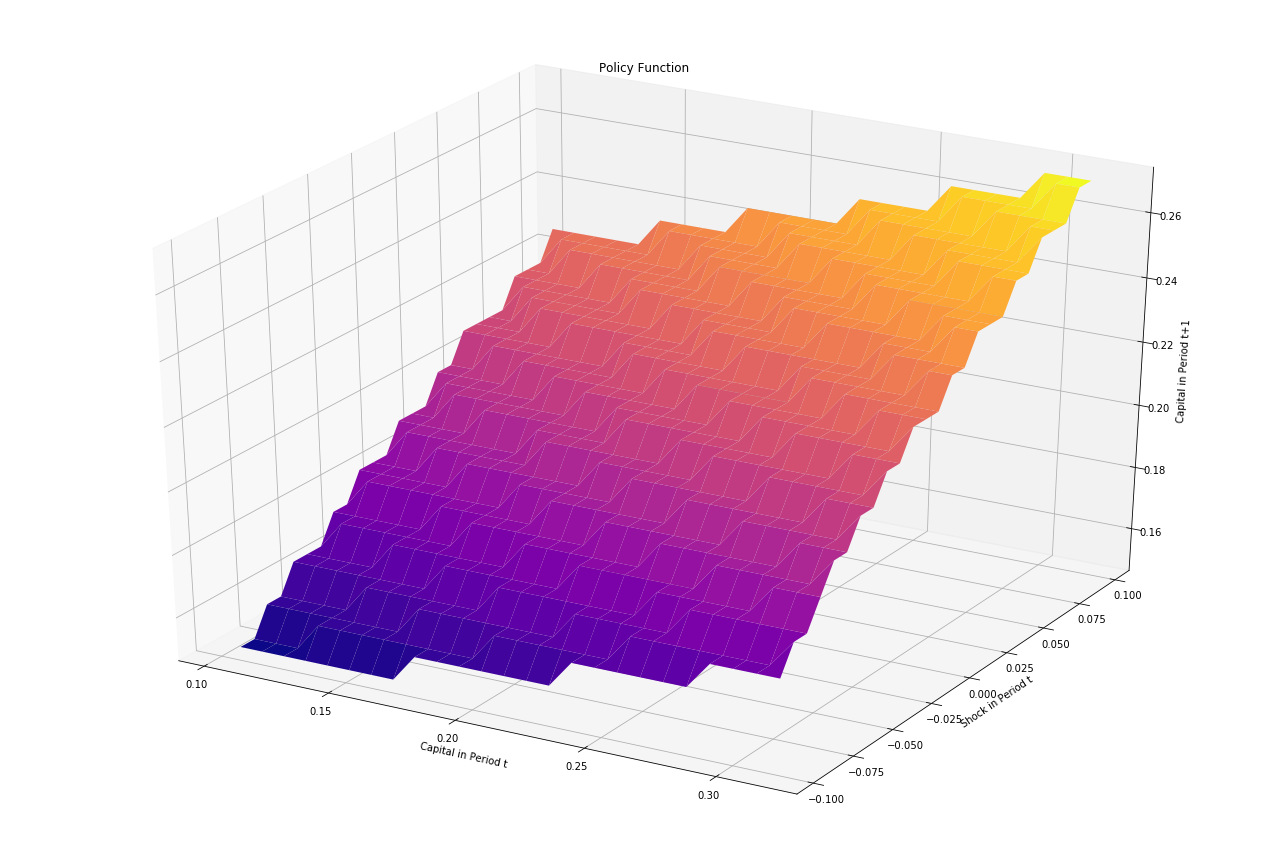

In [70]:
#3D plot
k, z = np.meshgrid(kgrid,zgrid)
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection="3d")
ax.plot_surface(k, z, kgrid[PF], cmap="plasma")
ax.set_xlabel("Capital in Period t")
ax.set_ylabel("Shock in Period t")
ax.set_zlabel("Capital in Period t+1")
plt.title("Policy Function")
plt.tight_layout()
plt.show()